<a href="https://colab.research.google.com/github/dribnet/clipit/blob/master/demos/PixelDrawer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

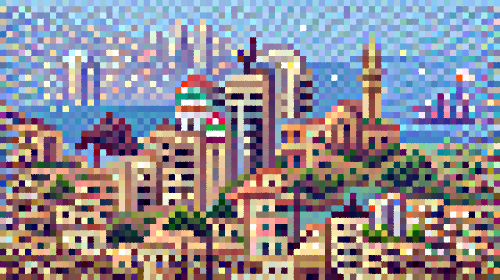
<br>
Beirut Skyline by <a href="https://twitter.com/gorillasu">Ahmad Moussa</a><br>
# CLIPIT PixelDraw demo

This version of the notebook is setup to easily change from VQGAN to PixelDraw to render the image.

In [1]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. For setup,
#@markdown **you need to run this cell,
#@markdown then choose Runtime -> Restart Runtime from the menu,
#@markdown and then run the cell again**. It should remind you to
#@markdown do this after the first run.

#@markdown Setup can take 5-10 minutes, but once it is complete it usually does not need to be repeated
#@markdown until you close the window.

#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.

# https://stackoverflow.com/a/56727659/1010653

from IPython.utils import io
with io.capture_output() as captured:
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone https://github.com/dribnet/clipit
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..

import sys
sys.path.append("clipit")

result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run Setup again"

js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

In [2]:
#@title Main Settings

#@markdown Enter a description of what you want to draw. I also usually add #pixelart to the prompt.
#@markdown 
#@markdown If PixelDraw is not used, it will use VQGAN instead.
#@markdown <br>

prompts = "Beirut Skyline. #pixelart" #@param {type:"string"}

aspect = "widescreen" #@param ["widescreen", "square"]

use_pixeldraw = True #@param {type:"boolean"}

#@markdown When you have the settings you want, press the play button on the left.
#@markdown The system will save these and we can then run it below.

# Simple setup
import clipit
from IPython import display

# these are good settings for pixeldraw
clipit.reset_settings()
clipit.add_settings(prompts=prompts, aspect=aspect)
clipit.add_settings(quality="better", scale=2.5)
clipit.add_settings(use_pixeldraw=use_pixeldraw)


/usr/local/lib/python3.7/dist-packages/html5lib/_trie/_base.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


## Optional custom settings

The code block below is a chance to sneak in some last settings before we start the code. For example, you can set the quality to "draft" or the scale to 4. This allows us to mix and match the best settings discussed in different notebooks.

Make sure you click the play button below *after* running the **Main Settings** above when changing settings.

In [3]:
# lines like this one starting with '#" are comments and do not get run

# here's an example setting: setting the quality to draft (faster)
# clipit.add_settings(quality="draft")

# this is the example of how to run longer with less frequent display
# clipit.add_settings(iterations=500, display_every=50)

100%|███████████████████████████████████████| 244M/244M [00:09<00:00, 26.0MiB/s]
100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 57.6MiB/s]
100%|███████████████████████████████████████| 335M/335M [00:07<00:00, 48.8MiB/s]


Using device: cuda:0
Optimising using: AdamP
Using text prompts: ['Beirut Skyline. #pixelart']
Using seed: 18421259466333922982


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/kornia/utils/helpers.py:96: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  out1, out2 = torch.solve(input.to(dtype), A.to(dtype))


iter: 0, loss: 2.83311, losses: 0.997594, 0.919615, 0.915904


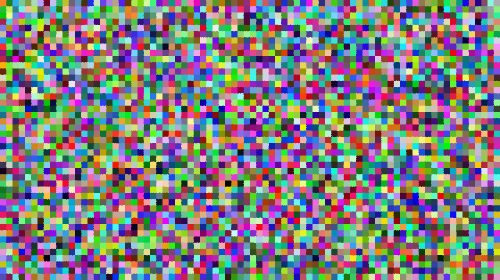

iter: 10, loss: 2.67196, losses: 0.962961, 0.844153, 0.864846
iter: 20, loss: 2.5315, losses: 0.93335, 0.788967, 0.809184
iter: 30, loss: 2.32421, losses: 0.859662, 0.731159, 0.733391
iter: 40, loss: 2.30741, losses: 0.869581, 0.718801, 0.719027
iter: 50, loss: 2.24165, losses: 0.84147, 0.702704, 0.697477


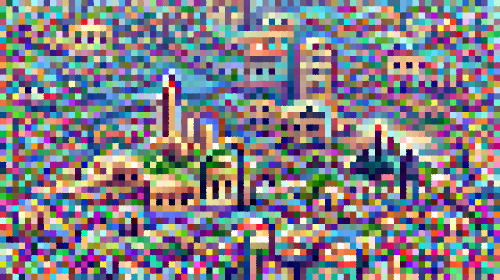

iter: 60, loss: 2.23964, losses: 0.833661, 0.703138, 0.702836
iter: 70, loss: 2.17519, losses: 0.806673, 0.688009, 0.680508
iter: 80, loss: 2.1767, losses: 0.803125, 0.689344, 0.684235
iter: 90, loss: 2.14776, losses: 0.788124, 0.682797, 0.676836
iter: 100, loss: 2.10022, losses: 0.770255, 0.669493, 0.660474


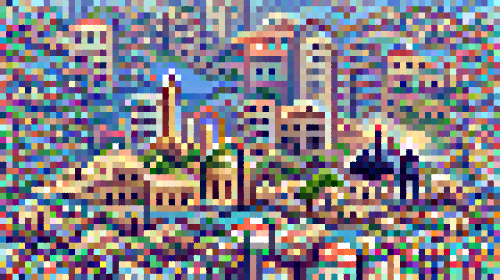

iter: 110, loss: 2.08091, losses: 0.763224, 0.663714, 0.653969
iter: 120, loss: 1.97856, losses: 0.705021, 0.644428, 0.629116
iter: 130, loss: 2.0789, losses: 0.762275, 0.66619, 0.650437
iter: 140, loss: 2.11644, losses: 0.778113, 0.676271, 0.662051
iter: 150, loss: 2.0714, losses: 0.756945, 0.661292, 0.65316


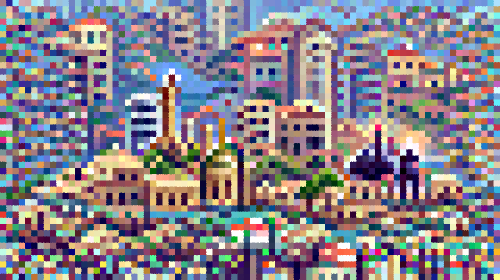

iter: 160, loss: 2.08705, losses: 0.761686, 0.666997, 0.658365
iter: 170, loss: 2.08243, losses: 0.763498, 0.669117, 0.649819
iter: 180, loss: 2.07677, losses: 0.762065, 0.665219, 0.649485
iter: 190, loss: 2.06791, losses: 0.758522, 0.661797, 0.647587
iter: 200, loss: 2.02227, losses: 0.731516, 0.652454, 0.638299


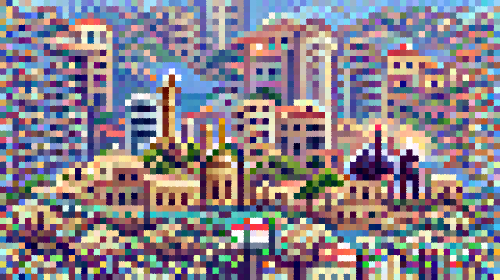

In [4]:
#@title Now Run

#@markdown Now we'll apply all settings and run.
#@markdown 
#@markdown Click the play button to the left to get this running.
#@markdown 
#@markdown When this is done, you can go above and change the
#@markdown model in the settings and see if you get different results.
#@markdown Note that the first time you run it may take a bit longer
#@markdown as nessary files are downloaded.

settings = clipit.apply_settings()
clipit.do_init(settings)

clipit.do_run(settings)